# CNN-LSTM

In [243]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import pydot
import graphviz

%matplotlib inline
plt.style.use("ggplot")

In [244]:
#loading dataset

dataset = pd.read_csv('/content/XOM.csv')
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,77.500000,77.940002,76.459999,77.459999,55.863224,20400100
1,2016-01-05,77.190002,78.139999,76.919998,78.120003,56.339207,11993500
2,2016-01-06,76.639999,77.639999,76.589996,77.470001,55.870419,18826900
3,2016-01-07,76.059998,77.989998,75.900002,76.230003,54.976170,21263800
4,2016-01-08,76.349998,76.650002,74.500000,74.690002,53.865532,19033600
...,...,...,...,...,...,...,...
1505,2021-12-23,61.169998,61.840000,61.000000,61.020000,59.164177,13543300
1506,2021-12-27,60.930000,61.950001,60.419998,61.889999,60.007717,12593700
1507,2021-12-28,61.910000,62.310001,61.400002,61.689999,59.813797,12781000
1508,2021-12-29,61.480000,61.599998,60.919998,61.150002,59.290226,12733600


In [245]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1510 non-null   object 
 1   Open       1510 non-null   float64
 2   High       1510 non-null   float64
 3   Low        1510 non-null   float64
 4   Close      1510 non-null   float64
 5   Adj Close  1510 non-null   float64
 6   Volume     1510 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 82.7+ KB


In [246]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1.510000e+03
mean,70.703980,71.297232,70.073576,70.685490,57.237529,1.691809e+07
std,15.747677,15.669689,15.826136,15.776943,9.848920,1.004226e+07
min,31.410000,32.380001,30.110001,31.450001,26.984411,3.851300e+06
25%,60.472501,61.287499,59.750000,60.467500,55.098206,9.959600e+06
50%,76.410000,77.064999,75.915001,76.475002,60.803404,1.374905e+07
75%,82.379999,82.787501,81.760002,82.297503,63.843827,2.055158e+07
max,95.440002,95.550003,94.639999,95.120003,69.803795,8.443940e+07


In [247]:
dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [248]:
dataset.reset_index(drop=True, inplace=True)
dataset.fillna(dataset.mean(), inplace=True)
dataset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,77.500000,77.940002,76.459999,77.459999,55.863224,20400100
1,2016-01-05,77.190002,78.139999,76.919998,78.120003,56.339207,11993500
2,2016-01-06,76.639999,77.639999,76.589996,77.470001,55.870419,18826900
3,2016-01-07,76.059998,77.989998,75.900002,76.230003,54.976170,21263800
4,2016-01-08,76.349998,76.650002,74.500000,74.690002,53.865532,19033600


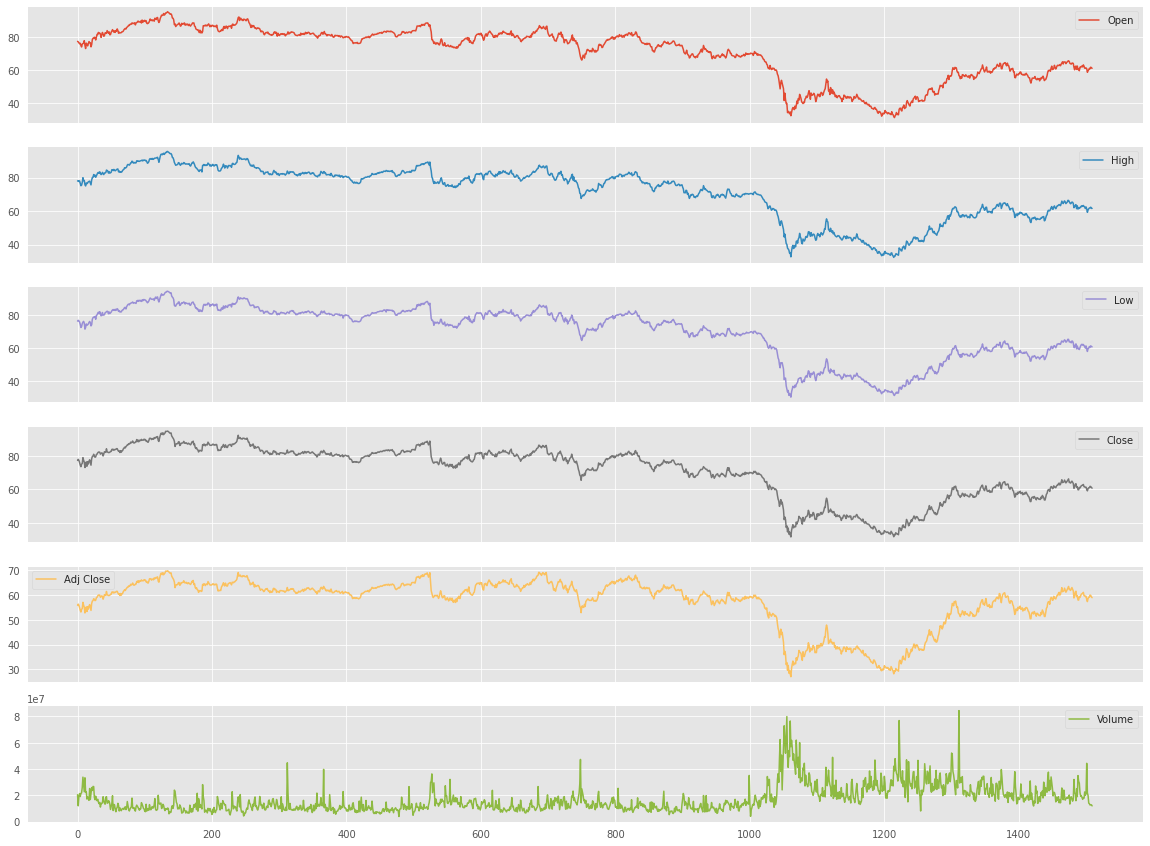

In [249]:
#plotting dataset

dataset.plot(legend=True,subplots=True, figsize = (20, 15))
plt.show()

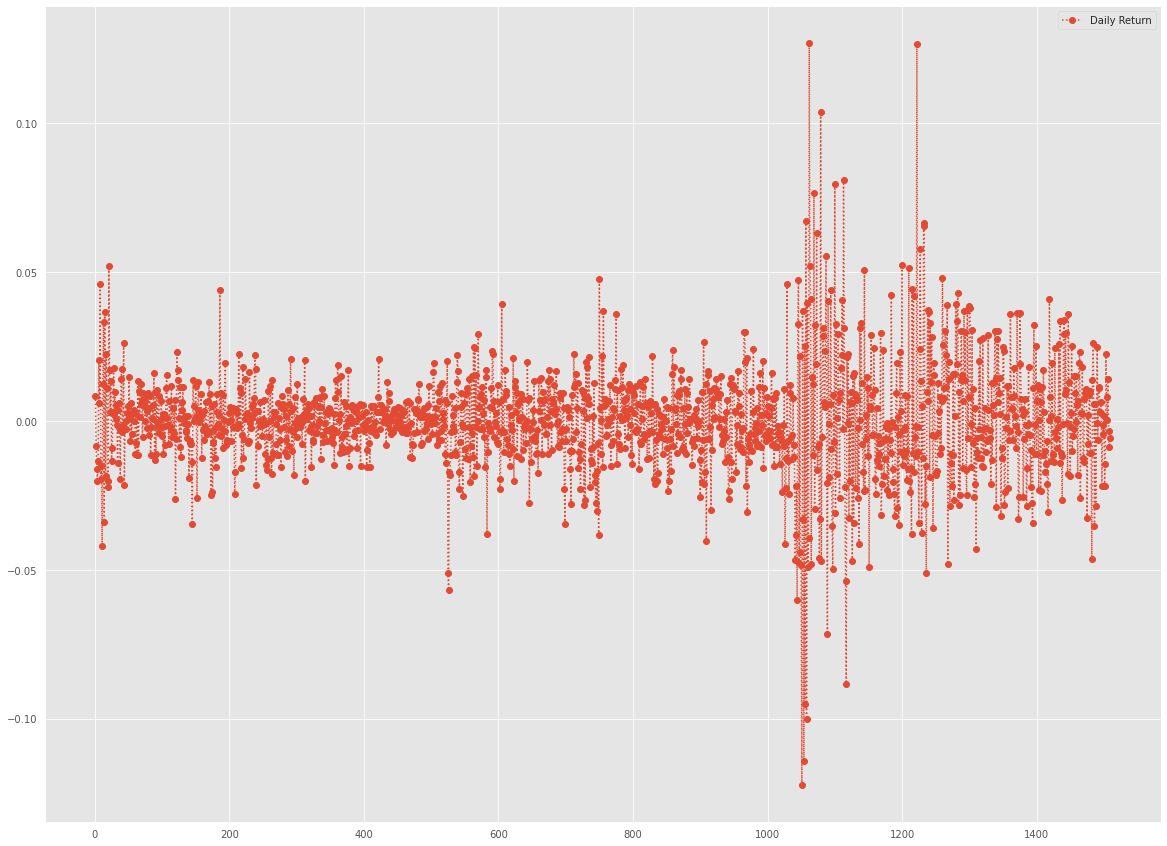

In [250]:
#Adding moving averages to the dataset

m_avg_day = [10, 50 ,100]
for i in m_avg_day:
    column_name = 'M_avg for %s days' %(str(i))
    dataset[column_name] = pd.DataFrame.rolling(dataset['Close'],i).mean()

dataset['Daily Return'] = dataset['Close'].pct_change()

# plotting Daily Return

dataset['Daily Return'].plot(figsize=(20,15),legend=True,linestyle=':',marker='o')
plt.show()

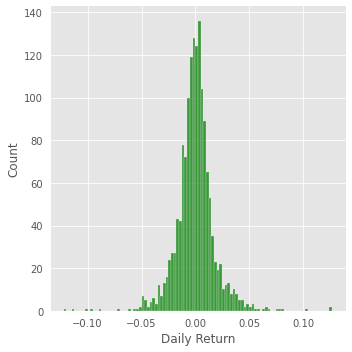

In [251]:
sns.displot(dataset['Daily Return'].dropna(),bins=100,color='green')
plt.show()

In [252]:
dataset.reset_index(drop=True, inplace=True)
dataset.fillna(dataset.mean(), inplace=True)
dataset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Date,Open,High,Low,Close,Adj Close,Volume,M_avg for 10 days,M_avg for 50 days,M_avg for 100 days,Daily Return
0,2016-01-04,77.500000,77.940002,76.459999,77.459999,55.863224,20400100,70.696636,70.714431,70.67006,0.000006
1,2016-01-05,77.190002,78.139999,76.919998,78.120003,56.339207,11993500,70.696636,70.714431,70.67006,0.008521
2,2016-01-06,76.639999,77.639999,76.589996,77.470001,55.870419,18826900,70.696636,70.714431,70.67006,-0.008321
3,2016-01-07,76.059998,77.989998,75.900002,76.230003,54.976170,21263800,70.696636,70.714431,70.67006,-0.016006
4,2016-01-08,76.349998,76.650002,74.500000,74.690002,53.865532,19033600,70.696636,70.714431,70.67006,-0.020202


In [253]:
dataset.nunique()

Date                  1510
Open                  1234
High                  1238
Low                   1233
Close                 1242
Adj Close             1441
Volume                1503
M_avg for 10 days     1498
M_avg for 50 days     1460
M_avg for 100 days    1412
Daily Return          1504
dtype: int64

In [254]:
dataset.sort_index(axis=1,ascending=True)

,Adj Close,Close,Daily Return,Date,High,Low,M_avg for 10 days,M_avg for 100 days,M_avg for 50 days,Open,Volume
0,55.863224,77.459999,0.000006,2016-01-04,77.940002,76.459999,70.696636,70.67006,70.714431,77.500000,20400100
1,56.339207,78.120003,0.008521,2016-01-05,78.139999,76.919998,70.696636,70.67006,70.714431,77.190002,11993500
2,55.870419,77.470001,-0.008321,2016-01-06,77.639999,76.589996,70.696636,70.67006,70.714431,76.639999,18826900
3,54.976170,76.230003,-0.016006,2016-01-07,77.989998,75.900002,70.696636,70.67006,70.714431,76.059998,21263800
4,53.865532,74.690002,-0.020202,2016-01-08,76.650002,74.500000,70.696636,70.67006,70.714431,76.349998,19033600
...,...,...,...,...,...,...,...,...,...,...,...
1505,59.164177,61.020000,0.000492,2021-12-23,61.840000,61.000000,61.052000,59.83130,62.835800,61.169998,13543300
1506,60.007717,61.889999,0.014258,2021-12-27,61.950001,60.419998,60.940000,59.88180,62.833600,60.930000,12593700
1507,59.813797,61.689999,-0.003232,2021-12-28,62.310001,61.400002,60.946000,59.92670,62.815600,61.910000,12781000
1508,59.290226,61.150002,-0.008753,2021-12-29,61.599998,60.919998,60.907000,59.95960,62.787400,61.480000,12733600


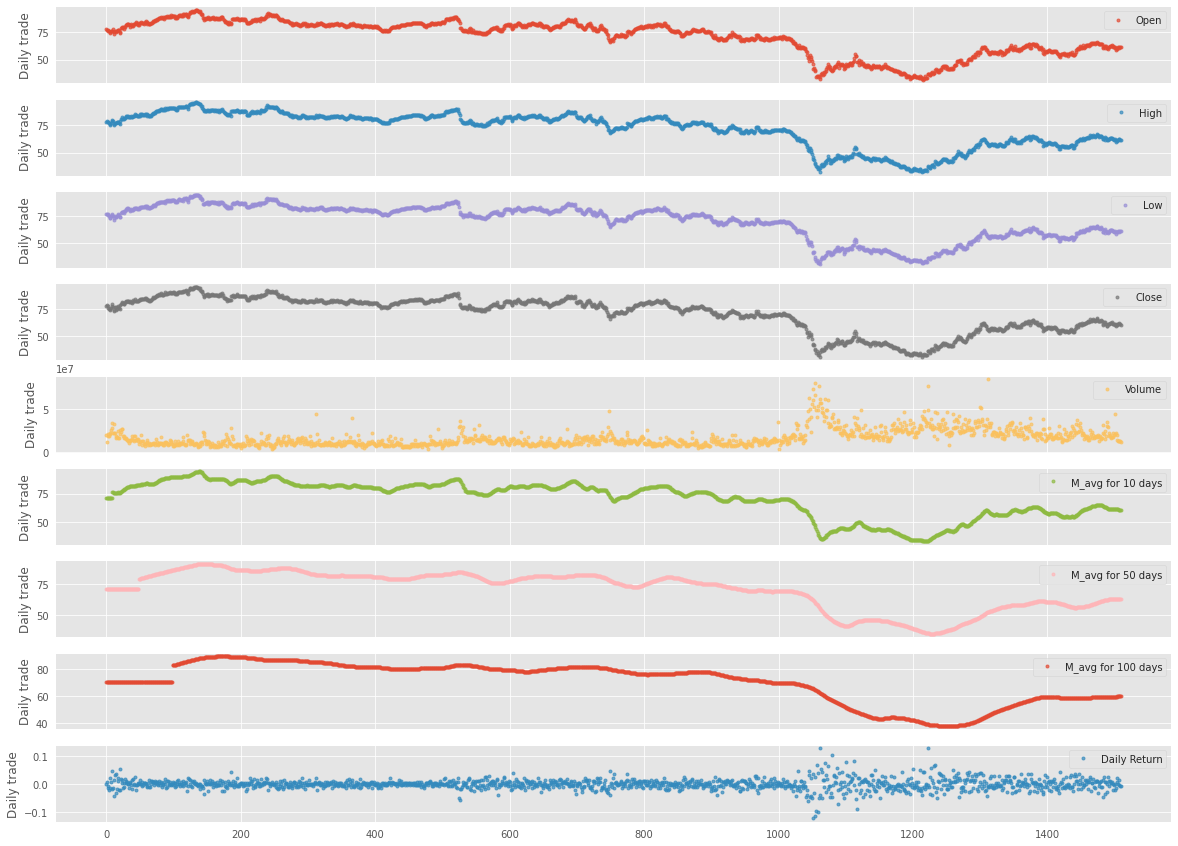

In [255]:
# plotting every column of the dataset

cols_plot = ['Open', 'High', 'Low','Close','Volume','M_avg for 10 days','M_avg for 50 days','M_avg for 100 days','Daily Return']
axes = dataset[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(20, 15), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

Text(0, 0.5, 'Closing price')

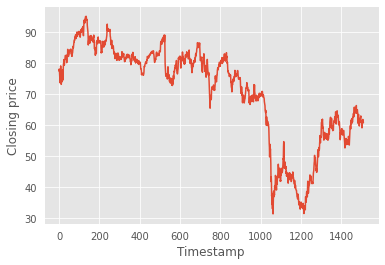

In [256]:
# plotting Close price of the dataset

plt.plot(dataset['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")

In [257]:
df = dataset
print(df)

            Date       Open       High        Low      Close  Adj Close  \
0     2016-01-04  77.500000  77.940002  76.459999  77.459999  55.863224   
1     2016-01-05  77.190002  78.139999  76.919998  78.120003  56.339207   
2     2016-01-06  76.639999  77.639999  76.589996  77.470001  55.870419   
3     2016-01-07  76.059998  77.989998  75.900002  76.230003  54.976170   
4     2016-01-08  76.349998  76.650002  74.500000  74.690002  53.865532   
...          ...        ...        ...        ...        ...        ...   
1505  2021-12-23  61.169998  61.840000  61.000000  61.020000  59.164177   
1506  2021-12-27  60.930000  61.950001  60.419998  61.889999  60.007717   
1507  2021-12-28  61.910000  62.310001  61.400002  61.689999  59.813797   
1508  2021-12-29  61.480000  61.599998  60.919998  61.150002  59.290226   
1509  2021-12-30  61.220001  61.599998  60.770000  60.790001  58.941174   

        Volume  M_avg for 10 days  M_avg for 50 days  M_avg for 100 days  \
0     20400100         

In [258]:
dataset.isnull().sum()

Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Adj Close             0
Volume                0
M_avg for 10 days     0
M_avg for 50 days     0
M_avg for 100 days    0
Daily Return          0
dtype: int64

In [259]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,1510.0,7.070398e+01,1.574768e+01,3.141000e+01,6.047250e+01,7.641000e+01,8.238000e+01,9.544000e+01
High,1510.0,7.129723e+01,1.566969e+01,3.238000e+01,6.128750e+01,7.706500e+01,8.278750e+01,9.555000e+01
Low,1510.0,7.007358e+01,1.582614e+01,3.011000e+01,5.975000e+01,7.591500e+01,8.176000e+01,9.464000e+01
Close,1510.0,7.068549e+01,1.577694e+01,3.145000e+01,6.046750e+01,7.647500e+01,8.229750e+01,9.512000e+01
Adj Close,1510.0,5.723753e+01,9.848920e+00,2.698441e+01,5.509821e+01,6.080340e+01,6.384383e+01,6.980379e+01
Volume,1510.0,1.691809e+07,1.004226e+07,3.851300e+06,9.959600e+06,1.374905e+07,2.055158e+07,8.443940e+07
M_avg for 10 days,1510.0,7.069664e+01,1.571032e+01,3.299100e+01,6.030375e+01,7.647000e+01,8.216875e+01,9.448700e+01
M_avg for 50 days,1510.0,7.071443e+01,1.540263e+01,3.483960e+01,5.976485e+01,7.630890e+01,8.197770e+01,9.152900e+01
M_avg for 100 days,1510.0,7.067006e+01,1.496801e+01,3.795420e+01,5.915968e+01,7.675175e+01,8.164973e+01,8.975560e+01
Daily Return,1510.0,5.831670e-06,1.824445e-02,-1.222478e-01,-8.203625e-03,0.000000e+00,7.916018e-03,1.268680e-01


In [260]:
df_close = df.reset_index()['Close']

In [261]:
df_close

0       77.459999
1       78.120003
2       77.470001
3       76.230003
4       74.690002
          ...    
1505    61.020000
1506    61.889999
1507    61.689999
1508    61.150002
1509    60.790001
Name: Close, Length: 1510, dtype: float64

In [262]:
# scaling close price of the data using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df_close=scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [263]:
df_close = pd.DataFrame(df_close)

In [264]:
# Dividing training and test data for plotting

training_size = int(len(df_close)*0.75)
test_size = len(df_close)-training_size
train_data,test_data=df_close.iloc[0:training_size,0],df_close.iloc[training_size:,0]

In [265]:
train_data

0       0.722632
1       0.732998
2       0.722789
3       0.703314
4       0.679127
          ...   
1127    0.215486
1128    0.191142
1129    0.202136
1130    0.208418
1131    0.192555
Name: 0, Length: 1132, dtype: float64

In [266]:
test_data

1132    0.198367
1133    0.203235
1134    0.185174
1135    0.183603
1136    0.155646
          ...   
1505    0.464426
1506    0.478090
1507    0.474949
1508    0.466468
1509    0.460814
Name: 0, Length: 378, dtype: float64

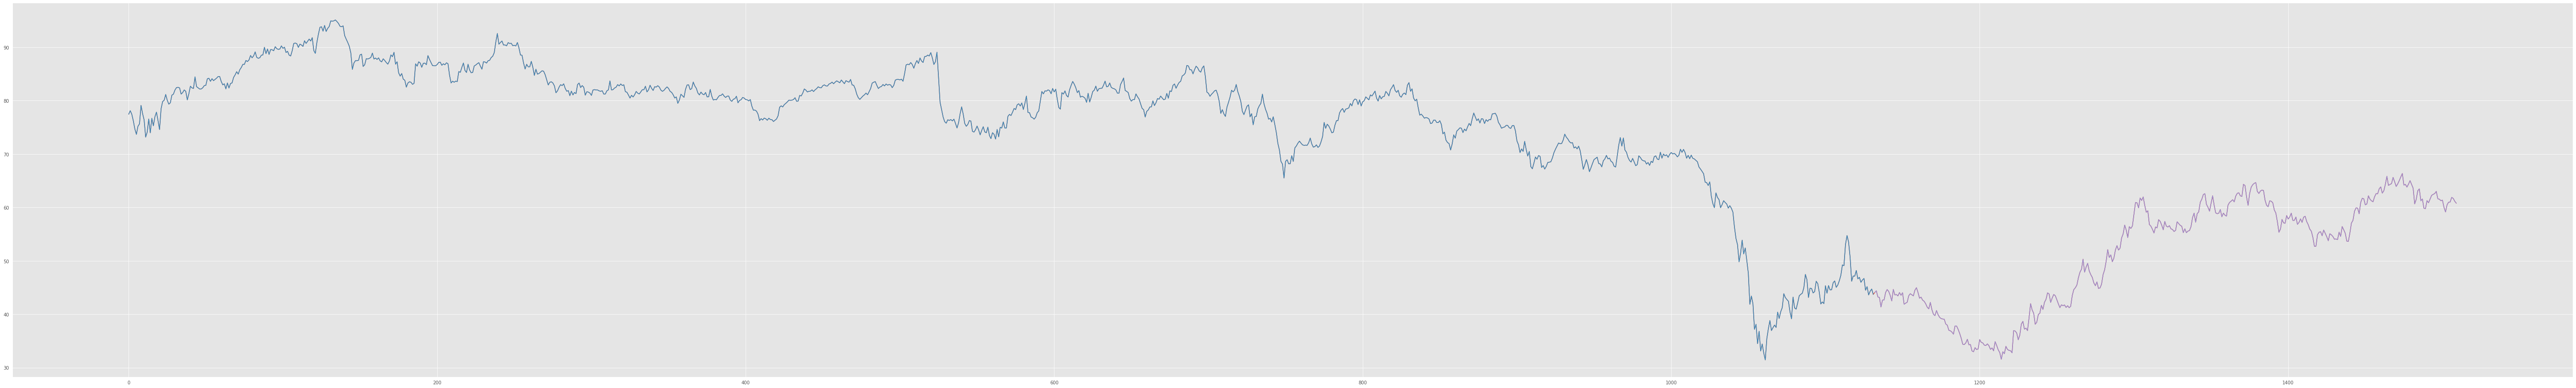

In [267]:
# Plotting training data,test data, and close price of the dataset 
train_dataPlot = np.empty_like(df_close)
train_dataPlot[:, :] = np.nan
train_dataPlot[0:len(train_data),0] = train_data

test_dataPlot = np.empty_like(df_close)
test_dataPlot[:, :] = np.nan
test_dataPlot[len(train_data):len(df_close),0] = test_data

plt.figure(figsize=(100,15))
plt.plot(scaler.inverse_transform(df_close))
plt.plot(scaler.inverse_transform(train_dataPlot))
plt.plot(scaler.inverse_transform(test_dataPlot))

plt.show()

In [268]:
#preparing data in time series format with the help of time step

X = []
Y = []
time_step=100
for i in range(1 , len(df_close) - time_step -1 , 1):
    temp = []
    temp2 = []
    for j in range(time_step):
        temp.append(df_close.iloc[i + j, 0])
    temp2.append(df_close.iloc[i + time_step, 0])
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

In [269]:
#splitting data into train and test for prediction

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

In [270]:
#reshaping data

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

In [271]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

In [272]:
# model layers including CNN and LSTM

cnn_lstm_model = tf.keras.models.Sequential([
    
    tf.keras.layers.TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))),
    tf.keras.layers.TimeDistributed(MaxPooling1D(2)),
    tf.keras.layers.TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')),
    tf.keras.layers.TimeDistributed(MaxPooling1D(2)),
    tf.keras.layers.TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')),
    tf.keras.layers.TimeDistributed(MaxPooling1D(2)),
    tf.keras.layers.TimeDistributed(Flatten()),
    
    tf.keras.layers.Bidirectional(LSTM(100, return_sequences=True)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Bidirectional(LSTM(100, return_sequences=False)),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(1, activation='linear')

])

In [273]:
#compiling and training the model

cnn_lstm_model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
history = cnn_lstm_model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
29/29 [==============================] - 16s 126ms/step - loss: 0.0803 - mse: 0.0803 - mae: 0.2101 - val_loss: 0.0170 - val_mse: 0.0170 - val_mae: 0.1067
Epoch 2/40
29/29 [==============================] - 1s 51ms/step - loss: 0.0192 - mse: 0.0192 - mae: 0.1081 - val_loss: 0.0100 - val_mse: 0.0100 - val_mae: 0.0714
Epoch 3/40
29/29 [==============================] - 1s 51ms/step - loss: 0.0160 - mse: 0.0160 - mae: 0.0985 - val_loss: 0.0076 - val_mse: 0.0076 - val_mae: 0.0630
Epoch 4/40
29/29 [==============================] - 1s 51ms/step - loss: 0.0133 - mse: 0.0133 - mae: 0.0889 - val_loss: 0.0112 - val_mse: 0.0112 - val_mae: 0.0887
Epoch 5/40
29/29 [==============================] - 1s 50ms/step - loss: 0.0117 - mse: 0.0117 - mae: 0.0826 - val_loss: 0.0118 - val_mse: 0.0118 - val_mae: 0.0923
Epoch 6/40
29/29 [==============================] - 1s 50ms/step - loss: 0.0120 - mse: 0.0120 - mae: 0.0843 - val_loss: 0.0047 - val_mse: 0.0047 - val_mae: 0.0498
Epoch 7/40
29/29 [==

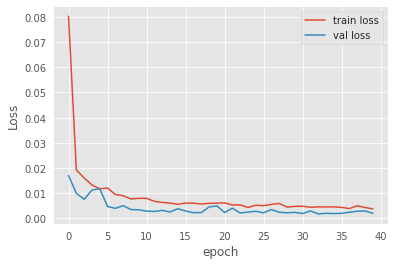

In [274]:
#plotting training and validation loss

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

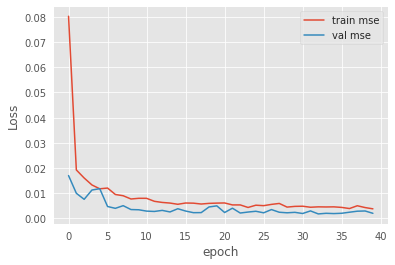

In [275]:
#plotting training and validation MSE

plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()


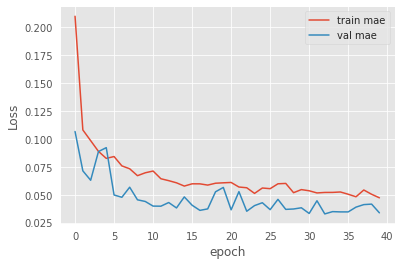

In [276]:
#plotting training and validation MAE

plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [277]:
#summary of the CNN-LSTM model

from tensorflow.keras.utils import plot_model
print(cnn_lstm_model.summary())
# plot_model(cnn_lstm_model, to_file='CNN_LSTM_Model.png', show_shapes=True, show_layer_names=True)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_42 (TimeDi  (None, 1, 98, 64)        256       
 stributed)                                                      
                                                                 
 time_distributed_43 (TimeDi  (None, 1, 49, 64)        0         
 stributed)                                                      
                                                                 
 time_distributed_44 (TimeDi  (None, 1, 47, 128)       24704     
 stributed)                                                      
                                                                 
 time_distributed_45 (TimeDi  (None, 1, 23, 128)       0         
 stributed)                                                      
                                                                 
 time_distributed_46 (TimeDi  (None, 1, 21, 128)      

In [278]:
# evaluating the model

cnn_lstm_model.evaluate(test_X, test_Y)

9/9 [==============================] - 0s 13ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0338


[0.0019910242408514023, 0.0019910242408514023, 0.03379187732934952]

In [279]:
# calculating variance, R2 score and Max error of the model

from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

y_pred_prob = cnn_lstm_model.predict(test_X, verbose=0)
y_pred_prob = y_pred_prob[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), y_pred_prob)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), y_pred_prob)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), y_pred_prob)
print('Max Error: %f' % var2)

Variance: 0.971212
R2 Score: 0.971212
Max Error: 0.176541


9/9 [==============================] - 0s 12ms/step


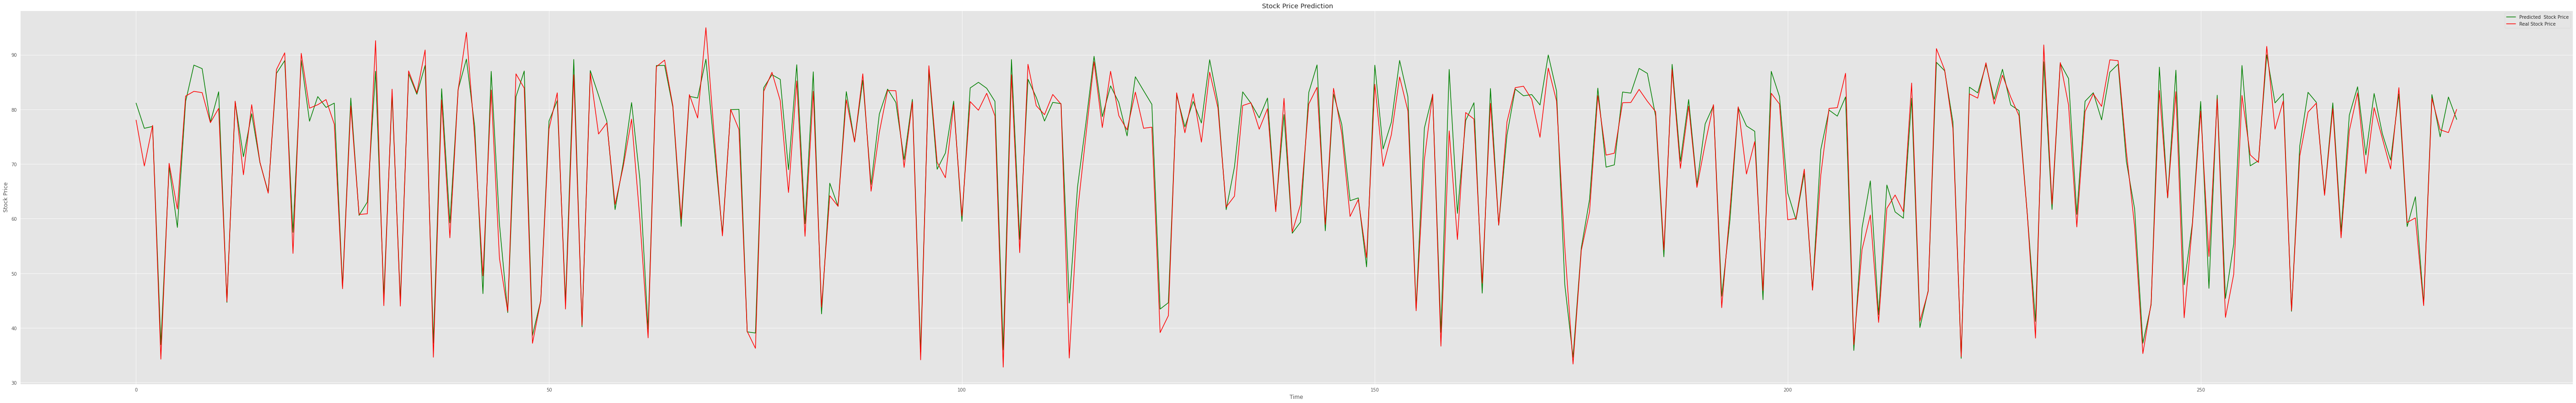

In [280]:
# plotting predicted value and test label

from pylab import rcParams
rcParams['figure.figsize'] = [100,15]

predicted  = cnn_lstm_model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_train = len(train_X)
plt.plot(scaler.inverse_transform(predicted), color = 'green', label = 'Predicted  Stock Price')
plt.plot(scaler.inverse_transform(test_label), color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [281]:
scaler.inverse_transform(predicted)

array([[81.143585],
       [76.53386 ],
       [76.87666 ],
       [36.940884],
       [69.54265 ],
       [58.390812],
       [81.45862 ],
       [88.10109 ],
       [87.45591 ],
       [77.650055],
       [83.220634],
       [44.672413],
       [81.383415],
       [71.34162 ],
       [79.20121 ],
       [70.2481  ],
       [64.83484 ],
       [86.59257 ],
       [88.92586 ],
       [57.497303],
       [88.97363 ],
       [77.83239 ],
       [82.339455],
       [80.36095 ],
       [81.14259 ],
       [47.57678 ],
       [82.07202 ],
       [60.59813 ],
       [63.034706],
       [86.97808 ],
       [45.69389 ],
       [82.81078 ],
       [44.917824],
       [86.52977 ],
       [82.76635 ],
       [88.033295],
       [37.221325],
       [83.77482 ],
       [59.235416],
       [83.6899  ],
       [89.19791 ],
       [76.91972 ],
       [46.277714],
       [86.96072 ],
       [59.030384],
       [42.805256],
       [82.31925 ],
       [87.02287 ],
       [38.63926 ],
       [45.01801 ],


In [282]:
scaler.inverse_transform(test_label)

array([[78.040001],
       [69.629997],
       [77.07    ],
       [34.279999],
       [70.129997],
       [61.77    ],
       [82.43    ],
       [83.300003],
       [83.059998],
       [77.57    ],
       [80.18    ],
       [44.830002],
       [81.510002],
       [68.029999],
       [80.860001],
       [70.330002],
       [64.660004],
       [87.300003],
       [90.349998],
       [53.639999],
       [90.260002],
       [80.220001],
       [80.849998],
       [81.790001],
       [77.290001],
       [47.169998],
       [80.639999],
       [60.77    ],
       [60.889999],
       [92.580002],
       [44.07    ],
       [83.699997],
       [43.990002],
       [87.040001],
       [83.010002],
       [90.870003],
       [34.639999],
       [81.730003],
       [56.490002],
       [83.580002],
       [94.089996],
       [74.870003],
       [49.529999],
       [83.540001],
       [52.740002],
       [43.040001],
       [86.5     ],
       [83.889999],
       [37.189999],
       [44.959999],
